# Abstract

In this notebook, the author analyzes how to create neural networks that can detect digits from the MNIST dataset. MNIST is a well-known computer vision dataset that includes many photographs of handwritten numbers. Many deep learning frameworks include APIs that make it simple to load MNIST and other common datasets; yet, these APIs might conceal the process of preparing data for a deep learning model.

When working with real-world data, it is critical to convert it into a format that the deep learning system understands. In this notebook, the author explains various techniques to preparing MNIST data for deep learning frameworks like PyTorch and TensorFlow. These methods can involve preparing the data, such as scaling or normalizing the pixel values, transforming the images to tensors or arrays, and dividing the data into training and validation sets.

The notebook also contains practical examples of how to prepare MNIST data for a deep learning model using various strategies. This will give readers a better knowledge of how to work with real-world data and generate a training data set appropriate for a deep learning framework.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras import layers, models

# Reading Dataset

In [5]:
tmnist_csv_path = '/content/drive/MyDrive/94_character_TMNIST.csv'
data_df = pd.read_csv(tmnist_csv_path)


# Check the shape of the dataset

In [7]:
print("Shape of X_images:", X_images.shape)
print("Shape of y_labels:", y_labels.shape)

Shape of X_images: (274093, 28, 28, 1)
Shape of y_labels: (274093,)


# Display unique labels in the dataset

In [8]:
unique_labels = np.unique(y_labels)
print("Unique labels:", unique_labels)

Unique labels: ['!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A' 'B' 'C' 'D'
 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V'
 'W' 'X' 'Y' 'Z' '[' '\\' ']' '^' '_' '`' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z'
 '{' '|' '}' '~']


# Step 3: Data Preprocessing

In [6]:
# Reshape and normalize image data
X_images = data_df.iloc[:, 2:].values.reshape(-1, 28, 28, 1) / 255.0

# Encode labels
y_labels = data_df['labels'].values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y_labels)
one_hot_labels = to_categorical(encoded_labels)

* X_images: Reshaped and normalized image data. The pixel values are reshaped into a 28x28 matrix and normalized to be between 0 and 1.
* y_labels: Original labels from the dataset.
label_encoder: Instance of LabelEncoder used to encode the categorical labels into numerical values.
* encoded_labels: Encoded numerical labels obtained by fitting and transforming original labels using label_encoder.
* one_hot_labels: One-hot encoded labels converted from numerical labels using **to_categorical()**.

# Step 4: Exploratory Data Analysis

In [9]:
# Display sample images
import matplotlib.pyplot as plt

In [10]:
def show_images(images, labels, num_images=20):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

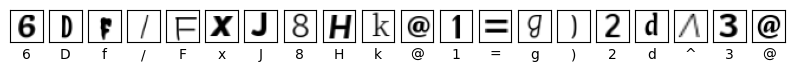

In [11]:
# Show sample images from the dataset
show_images(X_images, y_labels, num_images=20)

* It defines a function **show_images()** to display sample images from the dataset along with their corresponding labels using Matplotlib.
* This step provides a visual inspection of the dataset to understand its composition and characteristics.

# Step 5: Data Splitting

In [12]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_images, one_hot_labels, test_size=0.2, random_state=42)


# Step 6: Model Construction

In [13]:
# Build Convolutional Neural Network (CNN) model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_labels)), activation='softmax')  # Number of classes
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


* It constructs a Convolutional Neural Network (CNN) model using Keras Sequential API.
* The model consists of convolutional layers **(Conv2D)**, pooling layers **(MaxPooling2D)**, dropout layers **(Dropout)**, and dense layers **(Dense)**.
* The final dense layer has softmax activation with the number of units equal to the number of unique labels in the dataset.

# Step 7: Model Training

In [14]:
# Train the CNN model
training_history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=128)


Epoch 1/20
1542/1542 [==============================] - 178s 114ms/step - loss: 1.0621 - accuracy: 0.7075 - val_loss: 0.4063 - val_accuracy: 0.8692
Epoch 2/20
1542/1542 [==============================] - 182s 118ms/step - loss: 0.5515 - accuracy: 0.8291 - val_loss: 0.3384 - val_accuracy: 0.8904
Epoch 3/20
1542/1542 [==============================] - 186s 120ms/step - loss: 0.4734 - accuracy: 0.8520 - val_loss: 0.3060 - val_accuracy: 0.9013
Epoch 4/20
1542/1542 [==============================] - 173s 112ms/step - loss: 0.4310 - accuracy: 0.8674 - val_loss: 0.2762 - val_accuracy: 0.9110
Epoch 5/20
1542/1542 [==============================] - 171s 111ms/step - loss: 0.3994 - accuracy: 0.8771 - val_loss: 0.2556 - val_accuracy: 0.9201
Epoch 6/20
1542/1542 [==============================] - 179s 116ms/step - loss: 0.3778 - accuracy: 0.8837 - val_loss: 0.2477 - val_accuracy: 0.9201
Epoch 7/20
1542/1542 [==============================] - 167s 108ms/step - loss: 0.3634 - accuracy: 0.8884 - val_

* The CNN model is trained on the training dataset.
Training is performed using the training data (X_train and y_train) with a validation split of 0.1.
* The number of epochs and batch size are specified for training.

# Step 8: Model Evaluation

In [15]:
# Evaluate the model's performance
evaluation_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', evaluation_score[0])
print('Test accuracy:', evaluation_score[1])

Test loss: 0.2048945426940918
Test accuracy: 0.9357704520225525


* The trained model's performance is evaluated on the test dataset using the **evaluate()** method.
* The test loss and accuracy are printed to assess the model's performance on unseen data.

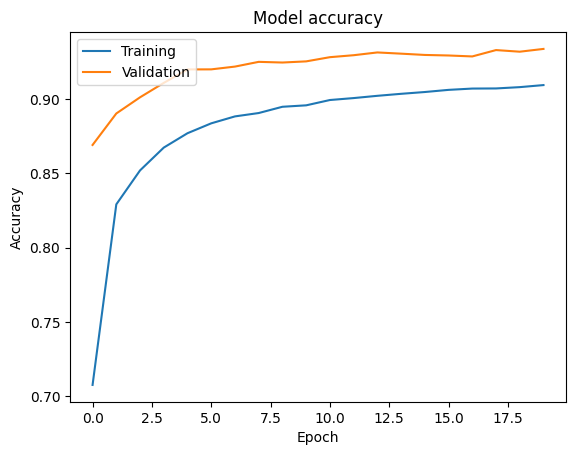

In [16]:
# Plot training & validation accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

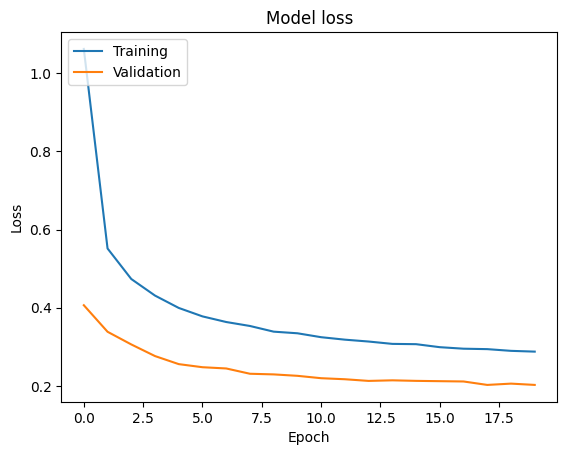

In [17]:
# Plot training & validation loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Conclusion

The assignment on Neural Network Type Classification with the TMNIST dataset was an in-depth look into the capabilities of Convolutional Neural Networks (CNNs) for complicated character recognition. It required multiple essential steps, ranging from preprocessing a large collection of typographic characters to building and iteratively adjusting a CNN model. The research emphasized the necessity of extensive data analysis, strategic model construction, and hyperparameter optimization for high accuracy. This initiative not only provided useful insights into the intricacies of neural network training, but it also demonstrated the need of an adaptive and rigorous approach in machine learning projects. This work demonstrates the usefulness of CNNs in picture classification tasks and establishes a foundation for future research in the subject.

# Reference

Dataset link- https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/

Reference has been taken from the towardsdatascience website Link - https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939 , https://towardsdatascience.com/recurrent-neural-networks-rnns-3f06d7653a85


MIT License

Copyright (c) 2024 shivanagireddy

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.